Libraries



In [42]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split , cross_val_score, GridSearchCV, StratifiedKFold

Import Data

In [43]:
# I'm Going to import Adult dataset from UCI , we need to define the columns first. 

columns = [
    'Age', 'Workclass', 'FinalWeight', 'Education',
    'Education_Num','Marital_Status', 'Ocupation',
    'Relationship','Race','Sex','Capital-Gain',
    'Capital-Loss','Hours-Per-Week', 'Native-Country','Income'
]

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header=None,
                  names=columns, skipinitialspace=True, na_values="?")

df



,Age,Workclass,FinalWeight,Education,Education_Num,Marital_Status,Ocupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Exploring Data

In [44]:
df.info()
#workclass, ocupation, native country has missing values. We will handle them later in our pipeline.
#Since our label income doesnt has any missing values i will change it to binary right away.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   FinalWeight     32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Marital_Status  32561 non-null  object
 6   Ocupation       30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital-Gain    32561 non-null  int64 
 11  Capital-Loss    32561 non-null  int64 
 12  Hours-Per-Week  32561 non-null  int64 
 13  Native-Country  31978 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [45]:
df['Income'] = df['Income'].apply(
    lambda x: 0 if x.strip() == "<=50K" else (1 if x.strip() == ">50K" else np.nan)
)
df['Income'].value_counts()

Income
0    24720
1     7841
Name: count, dtype: int64

In [46]:
df.describe()

,Age,FinalWeight,Education_Num,Capital-Gain,Capital-Loss,Hours-Per-Week,Income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [47]:
df.describe(include=['O'])

,Workclass,Education,Marital_Status,Ocupation,Relationship,Race,Sex,Native-Country
count,30725,32561,32561,30718,32561,32561,32561,31978
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22696,10501,14976,4140,13193,27816,21790,29170


In [48]:
df.columns

Index(['Age', 'Workclass', 'FinalWeight', 'Education', 'Education_Num',
       'Marital_Status', 'Ocupation', 'Relationship', 'Race', 'Sex',
       'Capital-Gain', 'Capital-Loss', 'Hours-Per-Week', 'Native-Country',
       'Income'],
      dtype='object')

In [49]:
df.groupby('Age',as_index= False)['Income'].mean()
#I will seperate ages as groups.

,Age,Income
0,17,0.000000
1,18,0.000000
2,19,0.002809
3,20,0.000000
4,21,0.004167
...,...,...
68,85,0.000000
69,86,0.000000
70,87,0.000000
71,88,0.000000


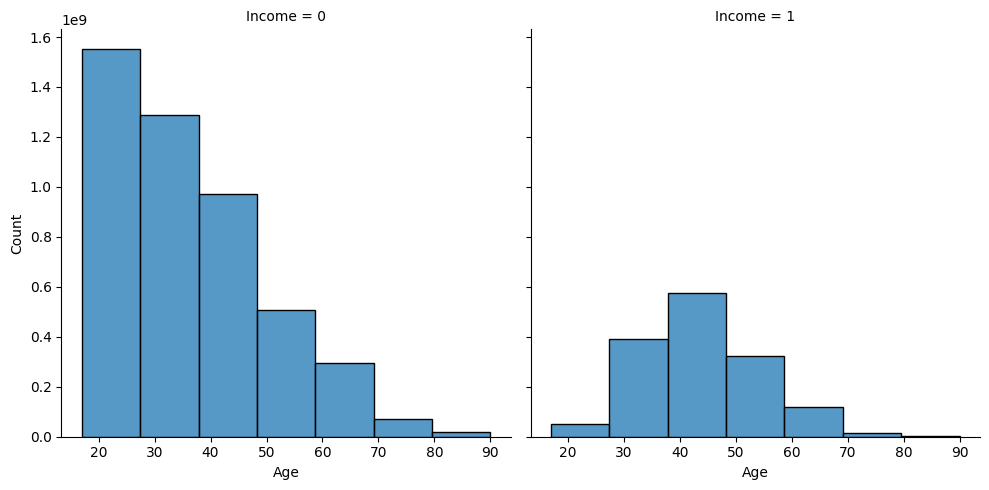

In [50]:
sns.displot(df , x='Age', col = 'Income', binwidth = 10, height=5, weights='FinalWeight')

In [51]:
bins = [0,18,35,65,100]
labels = ["Child","Young Working Age","Old Working Age", "Retired"]
df['Age_Groups'] = pd.cut(df['Age'],bins=bins,labels=labels,right=False)
df.groupby('Age_Groups', as_index=False)['Income'].mean()
#this way we will see the effect of age on income more clearly 

C:\Users\zero_\AppData\Local\Temp\ipykernel_29704\4232818537.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age_Groups', as_index=False)['Income'].mean()


,Age_Groups,Income
0,Child,0.000000
1,Young Working Age,0.108979
2,Old Working Age,0.353808
3,Retired,0.206587


In [52]:
df.head()

,Age,Workclass,FinalWeight,Education,Education_Num,Marital_Status,Ocupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income,Age_Groups
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,Old Working Age
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,Old Working Age
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,Old Working Age
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,Old Working Age
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,Young Working Age


In [53]:
dfWithWeight = df
df = df.drop('FinalWeight', axis=1)
df.head()

,Age,Workclass,Education,Education_Num,Marital_Status,Ocupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income,Age_Groups
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,Old Working Age
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,Old Working Age
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,Old Working Age
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,Old Working Age
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,Young Working Age


In [56]:
print(df[['Education','Education_Num']].drop_duplicates().sort_values('Education_Num'))

        Education  Education_Num
224     Preschool              1
160       1st-4th              2
56        5th-6th              3
15        7th-8th              4
6             9th              5
77           10th              6
3            11th              7
415          12th              8
2         HS-grad              9
10   Some-college             10
14      Assoc-voc             11
13     Assoc-acdm             12
0       Bachelors             13
5         Masters             14
52    Prof-school             15
20      Doctorate             16


In [ ]:
df.groupby('Education_Num',as_index=False)['Income'].mean()
#clearly as education goes up income also goes up but its not really linear so i will group them.

,Education_Num,Income
0,1,0.000000
1,2,0.035714
2,3,0.048048
3,4,0.061920
4,5,0.052529
5,6,0.066452
6,7,0.051064
7,8,0.076212
8,9,0.159509
9,10,0.190235


In [63]:
edu_map = { 1: 'Low_Edu', 2: 'Low_Edu', 3: 'Low_Edu', 4: 'Low_Edu', 5: 'Low_Edu', 6: 'Low_Edu', 7: 'Low_Edu', 8: 'Low_Edu', 9: 'Mid_Edu',
            10: 'Mid_Edu', 11: 'Mid_Edu', 12: 'Mid_Edu', 13: 'High_Edu', 14: 'High_Edu', 15: 'Higher_Edu', 16: 'Higher_Edu'}
df['Edu_Group'] = df['Education_Num'].map(edu_map)
df.groupby('Edu_Group',as_index=False)['Income'].mean().sort_values('Income')

,Edu_Group,Income
2,Low_Edu,0.057371
3,Mid_Edu,0.182204
0,High_Edu,0.449279
1,Higher_Edu,0.737108


In [64]:
df.head()

,Age,Workclass,Education,Education_Num,Marital_Status,Ocupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income,Age_Groups,Edu_Group
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,Old Working Age,High_Edu
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,Old Working Age,High_Edu
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,Old Working Age,Mid_Edu
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,Old Working Age,Low_Edu
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,Young Working Age,High_Edu


In [66]:
df.groupby('Marital_Status', as_index=False)['Income'].mean()

,Marital_Status,Income
0,Divorced,0.104209
1,Married-AF-spouse,0.434783
2,Married-civ-spouse,0.446848
3,Married-spouse-absent,0.081340
4,Never-married,0.045961
5,Separated,0.064390
6,Widowed,0.085599
